In [1]:
import numpy as np

In [2]:
np.__version__

'1.21.2'

##### Introducing Broadcasting

Broadcasting allows these types of binary operations to be performed on arrays of dif‐
ferent sizes—for example, we can just as easily add a scalar (think of it as a zerodimensional
array) to an
array:

In [3]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of dif‐
ferent sizes—for example, we can just as easily add a scalar (think of it as a zerodimensional
array) to an
array:

We can think of this as an operation that stretches or duplicates the value 5 into the
array [5, 5, 5], and adds the results. The advantage of NumPy’s broadcasting is that
this duplication of values does not actually take place, but it is a useful mental model
as we think about broadcasting. <br>
We can similarly extend this to arrays of higher dimension. Observe the result when
we add a one-dimensional array to a two-dimensional array:

In [5]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [6]:
 M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here the one-dimensional array a is stretched, or broadcast, across the second
dimension in order to match the shape of M.<br>

While these examples are relatively easy to understand, more complicated cases can
involve broadcasting of both arrays. Consider the following example:

In [7]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [8]:
a + b


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Just as before we stretched or broadcasted one value to match the shape of the other,
here we’ve stretched both a and b to match a common shape, and the result is a twodimensional
array! The
geometry of these
examples is visualized in
Figure
2-4.
1

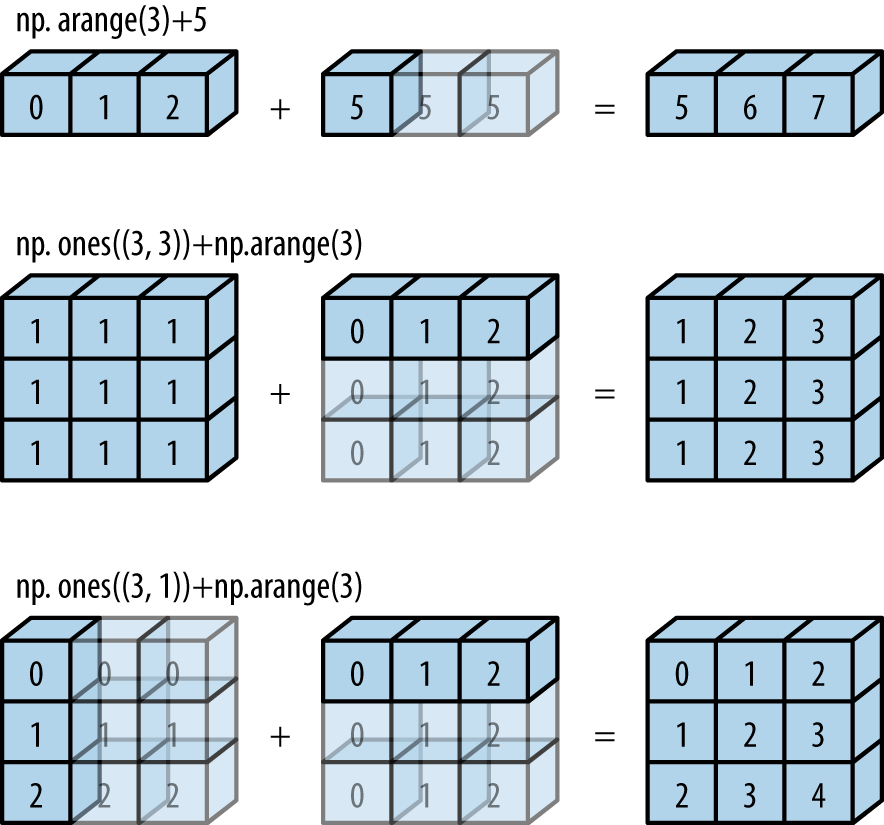

The light boxes represent the broadcasted values: again, this extra memory is not
actually allocated in the course of the operation, but it can be useful conceptually to
imagine that it is.

##### Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction
between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the
one with fewer dimensions is padded with ones on its leading (left) side.

- Rule 2: If the shape of the two arrays does not match in any dimension, the array
with shape equal to 1 in that dimension is stretched to match the other shape.

- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is
raised.

To make these rules clear, let’s consider a few examples in detail.

##### Broadcasting example 1

Let’s look at adding a two-dimensional array to a one-dimensional array:

In [9]:
M = np.ones((2, 3))
a = np.arange(3)

Let’s consider an operation on these two arrays. The shapes of the arrays are:

In [12]:
M.shape, a.shape

((2, 3), (3,))

We see by rule 1 that the array a has fewer dimensions, so we pad it on the left with
ones:

    
M.shape -> (2, 3) <br>
a.shape -> (1, 3)

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension
to match:


M.shape -> (2, 3) <br>
a.shape -> (2, 3)

The shapes match, and we see that the final shape will be (2, 3):

In [13]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

##### Broadcasting example 2

Let’s take a look at an example where both arrays need to be broadcast:

In [14]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

Again, we’ll start by writing out the shape of the arrays:

In [15]:
a.shape, b.shape

((3, 1), (3,))

Rule 1 says we must pad the shape of b with ones:

a.shape -> (3, 1) <br>
b.shape -> (1, 3)

And rule 2 tells us that we upgrade each of these ones to match the corresponding
size of the other array:

a.shape -> (3, 3) <br>
b.shape -> (3, 3)

Because the result matches, these shapes are compatible. We can see this here:

In [16]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

##### Broadcasting example 3

Now let’s take a look at an example in which the two arrays are not compatible:

In [17]:
M = np.ones((3, 2))
a = np.arange(3)

This is just a slightly different situation than in the first example: the matrix M is
transposed. How does this affect the calculation? The shapes of the arrays are:

In [18]:
M.shape, a.shape

((3, 2), (3,))

Again, rule 1 tells us that we must pad the shape of a with ones:
    
M.shape -> (3, 2) <br>
a.shape -> (1, 3)

By rule 2, the first dimension of a is stretched to match that of M:
M.shape -> (3, 2) <br>
a.shape -> (3, 3)

Now we hit rule 3—the final shapes do not match, so these two arrays are incompati‐
ble, as we can observe by attempting this operation:

In [19]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

Note the potential confusion here: you could imagine making a and M compatible by,
say, padding a’s shape with ones on the right rather than the left. But this is not how
the broadcasting rules work! That sort of flexibility might be useful in some cases, but
it would lead to potential areas of ambiguity. If right-side padding is what you’d like,
you can do this explicitly by reshaping the array

In [20]:
a[:, np.newaxis].shape

(3, 1)

In [21]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

Also note that while we’ve been focusing on the + operator here, these broadcasting
rules apply to any binary ufunc. For example, here is the logaddexp(a, b) function,
which computes log(exp(a) + exp(b)) with more precision than the naive
approach:

In [24]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

##### Centering an array

In the previous section, we saw that ufuncs allow a NumPy user to remove the need
to explicitly write slow Python loops. Broadcasting extends this ability. One commonly seen example is centering an array of data. Imagine you have an array of 10
observations, each of which consists of 3 values.

In [25]:
X = np.random.random((10, 3))

We can compute the mean of each feature using the mean aggregate across the first
dimension:

In [26]:
Xmean = X.mean(0)
Xmean

array([0.66998628, 0.47272466, 0.47757083])

And now we can center the X array by subtracting the mean (this is a broadcasting
operation):

In [27]:
 X_centered = X - Xmean

To double-check that we’ve done this correctly, we can check that the centered array
has near zero mean:

In [28]:
X_centered.mean(0)


array([-7.77156117e-17, -5.55111512e-17, -2.22044605e-17])

##### Plotting a two-dimensional function

One place that broadcasting is very useful is in displaying images based on twodimensional functions. If we
want to define a function <br>
f(x,
y), broadcasting can
be
used to
compute the function across the
grid:

In [29]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

In [30]:
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [31]:
import matplotlib.pyplot as plt

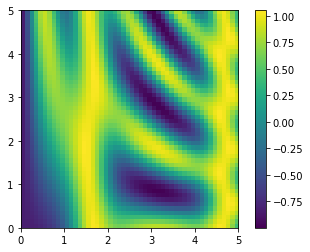

In [33]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
                   cmap='viridis')
plt.colorbar();